<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220830_boston_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보스턴 집값 예측하기
 - 사이킷런이 제공하는 14개 특징(feature)을 갖는 보스턴 집값 데이터
 - 알고리즘 : MLP
 - 문제유형 : 회귀
 - 평가지표 : 평균제곱오차

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
import pandas as pd

from sklearn.datasets import load_boston

dataset = load_boston()
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
data['target'] = dataset['target'] # 데이터에 정답 추가

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# 선형회귀 MLP 모델 설계

import torch
import torch.nn as nn
from torch.optim.adam import Adam

# 모델 정의
model = nn.Sequential(nn.Linear(13, 100),   # 13개의 특징(feature)가 있으므로
                      nn.ReLU(),            # 활성화 함수층
                      nn.Linear(100, 1))    # 출력층

X = data.iloc[:, :-1].values # df.values : DataFrame형식에서 데이터만(배열형식으로) 사용
Y = data['target'].values

batch_size = 100
learning_rate = 0.001

# 가중치를 수정하는 최적하 함수 정의
optim = Adam(model.parameters(), lr=learning_rate) # 모델의 가중치(파라미터)를 파라미터로 받음

# 에포크 반복
for epoch in range(200):

    # 배치 반복
    for i in range(len(X)//batch_size):
        start = i * batch_size  # 배치 크기에 맞게 인덱스 지정
        end = start + batch_size

        # 하나의 배치크기에 해당하는 데이터 설정
        x = torch.FloatTensor(X[start:end]) # torch.size([100, 13])
        y = torch.FloatTensor(Y[start:end]) # torch.size([100, 1])

        optim.zero_grad() # 각 배치마다 가중치의 기울기를 0으로 초기화
        preds = model(x)  # 모델을 이용한 예측값
        criterion = nn.MSELoss()    # MSE손실 생성
        loss = criterion(preds, y)  # MSE손실 계산
        loss.backward()   # 오차(손실) 역전파(오차에 대한 가중치 미분계산) 
        optim.step()      # 가중치 업데이트
    
    if epoch % 20 == 0:
        print(f'epoch{epoch} loss{round(loss.item(), 3)}')
    

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss766.361
epoch20 loss37.98
epoch40 loss39.001
epoch60 loss38.508
epoch80 loss38.294
epoch100 loss38.115
epoch120 loss37.924
epoch140 loss37.847
epoch160 loss37.78
epoch180 loss37.745


### 모델 성능 평가
 - 데이터셋에서 행 하나를 추출해 실제값과 예측값을 비교해 보자

In [18]:
prediction = model(torch.FloatTensor(X[0, :13])) # 훈련된 모델임
real = Y[0]

print(prediction, real)

tensor([26.3186], grad_fn=<AddBackward0>) 24.0


 - 집값과 동시에 지역, 집주인 나이를 예측하려면?
 - 각각을 학습하는 모델을 만들지 않음
 - 다중 출력으로 모델을 설정

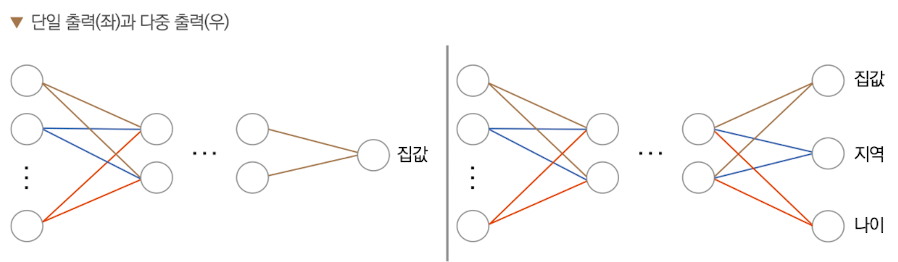

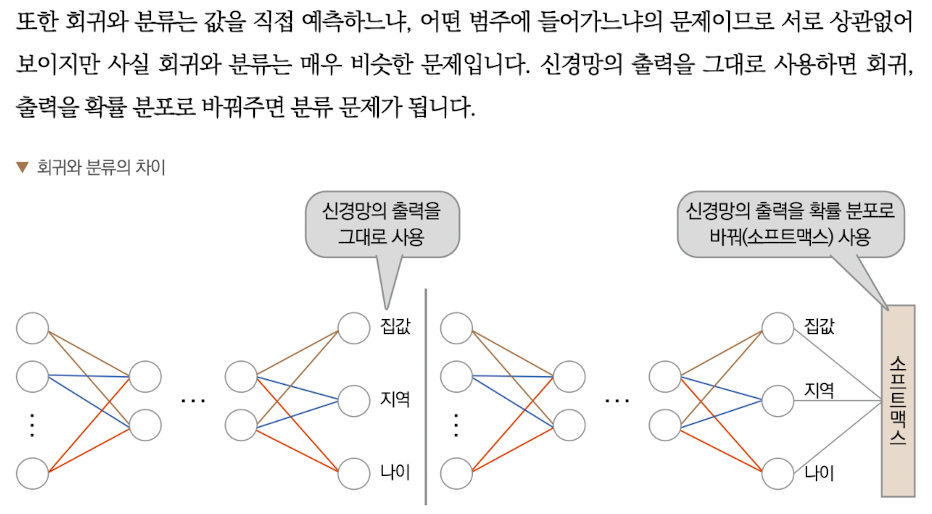